모델의 학습 과정에 비해 화려하지 않을 수 있어도, 성능 평가(evaluation)는 머신러닝 모델을 만드는 데 있어 필수 작업 중 하나로 꼽힙니다. 올바른 성능 평가가 이루어져야 정확하게 모델의 완성도를 측정하고, 학습에 대한 평가를 끝내고, 모델이 충분히 완성되었다고 판단할 수 있기 때문입니다.

각 머신러닝 문제는 서로 다른 성능평가 척도(Evaluation Metric) 를 가지며, 하나의 문제에 대해서도 목적에 따라 여러 가지 척도를 사용할 수 있습니다.
아마 분류(classification) 문제에서 accuracy만으로 모델의 성능을 평가하기에 충분하지 않다는 것과 관련하여, precision, recall 개념은 이미 들어보셨을 것입니다. 하지만 이것 말고도 엄청나게 많은 평가 척도들이 존재한답니다. 잠깐 사이킷런에서 제공하는 아래 링크의 문서를 훑어보세요. 꼼꼼이 읽지 마시고, 지금은 그냥 한번 훑어만 보시길 권합니다.

Metrics and scoring
- https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-ranking-metrics

어떤가요? 머신러닝의 성능평가 척도의 종류가 이렇게나 많습니다. 오늘의 짧은 시간 동안에 이 많은 척도들의 정의와 용도를 모두 꼼꼼이 살펴보는 것은 불가능할 것 같습니다. 심지어, 위 사이킷런에서 소개하는 것 말고도 훨씬 많은 다양한 성능평가 척도가 존재합니다. 머신러닝에는 분류(Classification) 말고도 회귀(Regression), 랭킹(Ranking), 군집(Clustering) 등 다양한 모델이 존재하며, 딥러닝을 통해 이미지, 텍스트, 음성 등을 다루는 분야에는 또 그에 적합한 성능평가 방식을 별도로 필요로 하기 때문입니다.

오늘은 그중 분류모델에 대한 성능평가 척도를 중심으로, 모델의 성능을 규정하기 위해 고려해야 할 다양한 관점에 대해 생각해 보고자 합니다. 또한 다양한 분야별로 존재하는 가장 대표적인 성능평가 척도를 알아보고, 왜 이런 평가 방식이 필요한지를 이해하는 데 초점을 맞추려고 합니다.

### 학습 내용
    Loss와 Metric
        Loss와 Metric의 차이는 무엇일까요?
    Confusion Matrix 와 Precision/Recall
        Confusion Matrix 와 Precision/Recall의 개념에 대해 알아봅니다.
    Threshold의 변화에 따른 모델 성능
        Threshold를 변경하며 모델 성능을 확인하는 실습을 해봅니다.
    Precision-Recall 커브
        Precision-Recall 커브를 직접 코드로 그려보며 알아봅니다.
    ROC 커브
        ROC 커브에 대해 살펴봅니다.
    다양한 머신러닝 모델의 평가척도
        이외에도 몇 가지 평가척도에 대해 살펴봅니다.

### 학습 목표
    머신러닝 학습 결과를 평가할 수 있습니다.
    Precision과 Recall의 관계를 이해할 수 있습니다
    AUC 영역을 통해 모델 간의 퍼포먼스를 비교할 수 있습니다.

### Loss와 Metric
들어가기에 앞서, 먼저 질문을 하나 드리겠습니다. 여러분은 Loss와 Metric의 차이를 설명할 수 있으신가요? 예를 들어 **RMSE(Root Mean Square Error)** 라는 개념은 Loss 함수로도 사용되기도 하고, 회귀 모델의 Metric으로 사용되기도 합니다. 
단순히 수식의 차이로 설명할 수는 없겠죠? 오히려 두 개념은 사용되는 시점과 용도가 다르다고 할 수 있겠습니다.

- Loss : 모델 학습시 학습데이터(train data) 를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수
- Metric : 모델 학습 종료 후 테스트데이터(test data) 를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수
   
우리가 아주 잘 아는 MNIST 손글씨 분류 모델을 떠올려 봅시다. 분류 모델의 Loss함수로 무엇이 사용되었나요? 네, Cross Entropy Loss였습니다. 하지만 그렇게 학습된 모델을 평가하는 Metric은 뭐였을까요? 바로 Accuracy였습니다. 왜 굳이 Loss와 Metric을 다르게 적용했을까요? 만약 학습데이터 배치에 대해 모델이 계산한 train accuracy를 Loss로 삼아서 학습을 진행하면 안되는 걸까요?

그러면 안된다는 것을 잘 설명해 주는 재미있는 글이 있어서 소개합니다.
https://modulabs.co.kr/blog/loss-versus-accuracy/
- 대부분의 metric 함수는 불연속적이라 미분이 불가능한 형태입니다. 하지만 모델 학습에 주로 사용되는 경사하강법 계열의 알고리즘들은 미분 가능한 함수를 필요로 하죠. 따라서 metric을 그대로 사용하면 이 알고리즘들을 적용할 수 없게 됩니다.

- metric 함수는 그 특성상 값이 크게 변동하는 경향이 있습니다. 이는 최적화 과정을 매끄럽지 못하게 만들어 학습을 방해하는 요인이 됩니다. 모델이 국소 최적점에 빠지거나 발산할 위험이 커지는 거죠.

- 모델이 학습 데이터에만 과도하게 최적화되는 과적합 문제가 발생할 수 있습니다. 일반적인 환경에서 실제 성능은 오히려 낮아질 수 있다는 이야기입니다.

- 마지막으로 일부 metric은 전체 데이터에 대해서만 계산 가능한 경우가 있어, 미니배치를 사용하는 학습 과정에 적용하기 어려울 수 있습니다. 이는 계산 효율 측면에서도 좋지 않습니다.

#### Accuracy가 학습단계에 좋은 Loss가 될 수 없는지
Discrete한 Accuracy는 Continuous한 Cross Entropy에 비해, 파라미터가 학습되어야 할 방향을 정확하게 제시하지 못한다. 비록 위 예시에서 1번 케이스는 Accuracy는 2번 케이스보다 낮았지만, Loss를 낮추는 쪽으로 더 학습이 진행되면 Accuracy도 높이면서 A, B, C간 확률분포의 차이(0.7-0.15)를 더욱 뚜렷하게 해서 결과적으로는 더 명확한 분류 기준을 학습한 모델이 될 여지가 있다.
Accuracy를 기준으로 학습이 진행된다면 2번 케이스는 이미 완벽한 Accuracy에 도달했으므로 더이상 정교한 학습이 이루어질 여지가 없어서(Accuracy가 loss가 된다면 loss=0) A, B, C간 확률분포의 차이(0.5-0.25)가 더 커지도록 학습이 진행되지 않을 것이다.

분류모델의 성능을 평가하는데는 Accuracy가 더 우월한 Metric입니다. 궁극적으로 우리가 원하는 모델은 테스트 데이터에 대한 Accuracy가 높은 모델이지, Cross Entropy가 얼마나 낮아졌는지가 우리의 궁극적 관심은 아닙니다. 하지만 모델의 정확성을 향상시켜 궁극적으로 Accuracy가 높은 모델을 만들기 위해 활용하는 Loss로는 Cross Entropy가 더욱 적당한 것입니다.

하지만 회귀모델일 경우 RMSE가 Loss와 Metric 양쪽으로 효과적으로 사용될 수도 있습니다. 즉, Loss나 Metric으로 어떤 함수를 활용할지는 해결해야 할 Task에 따라 다릅니다. 하지만 우리가 해결해야 할 문제에 어떤 Loss나 Metric이 적당한지를 판단하는 직관력은 정말 중요합니다.

### Confusion Matrix 와 Precision/Recall
분류 모델로 되돌아가 봅시다. 
하지만 우리는 분류 모델에서 Accuracy가 항상 좋은 Metric이 되지 않을 수 있다는 것을 알고 있습니다. 분류 모델 측면에서 모델의 결과가 이진 분류되는 형태일 때, 모델의 예측 결과와 실제 정답셋을 비교하여 아래의 표처럼 4가지 항목으로 표현하는 *Confusion Matrix*을 떠올려 봅시다.

![img](data/confusion_matrix.png)
>True Positive (TP) - 모델이 양성(Positive)을 양성으로 맞혔을 때
>True Negative (TN) - 모델이 음성(Negative)을 음성으로 맞혔을 때
>False Positive (FP) - 모델이 음성(Negative)을 양성(Positive)으로 잘못 예측했을 때
>False Negative (FN) - 모델이 양성(Positive)을 음성(Negative)으로 잘못 예측했을 때

그러면 분류 모델 측면에서 우리가 아는 정확도(Accuracy) 는 전체 표본 중 정확히 분류된 표본의 수 라고 볼 수 있습니다.
즉, 이진 분류일 때 정확도를 아래의 식으로 표현할 수 있습니다.

$$ 정확도(Accuracy) = {{TP + TN}\over {TP + TN + FP + FN}} $$

멀티 클래스(multi-class)의 분류 결과를 하고 있다면, 표본의 결과를 정답, 오답으로 나누어 아래의 식으로 표현할 수 있습니다.

$$ 정확도(Accuracy) = {(정답을 맞힌 예측의 수) \over (전체 문제의 수)}={{TP + TN}\over {TP + TN + FP + FN}} $$

병원에 내원한 환자가 암인지 아닌지 구분하는 예측모델을 만드는 경우를 생각해 봅시다. 100명의 환자에 대한 예측에 대해 다음과 같은 결과를 얻었습니다.

- TP(실제로 암이면서, 암으로 예측한 결과) = 1
- TN(실제로 정상이고, 정상으로 예측한 결과) = 90
- FN(실제로 암이지만, 정상으로 예측한 결과) = 8
- FP(실제로 정상이지만, 암으로 예측한 결과) = 1

### Precision과 Recall
혹시 모델의 정확도와 함께 언급되는 Precision과 Recall에 대해 들어보셨나요? Precision은 정밀도, Recall은 재현율이라는 단어로 표시하지만, 단어 원래 의미를 충분히 표현하기 어려워 단어 자체를 그대로 사용하곤 합니다.

위에서 언급된 암환자 예측 모델 사례를 다시 생각해 봅시다. 정확도(Accuracy) 대신 정밀도(Precision) 개념은 다음과 같이 정의됩니다.  
  
$$ 정밀도(Precision) = {{TP}\over {TP + FP}} $$

이 개념은 <u>모델이 양성으로 규정한 것이 얼마나 정확한지</u>를 보고 싶은 것입니다. 모델이 음성으로 규정한 것에 대해서는 크게 관심이 없습니다. 정밀도가 높다는 것은 FP가 낮다는 것입니다. 즉 모델이 양성으로 잘못 규정한 것이 적을수록 정밀도는 올라갑니다.

$$ 재현율(Recall) = {{TP}\over {TP + FN}} $$

이 개념은 <u>실제로 양성이 것들이 얼마나 모델에 의해 정확하게 탐지되었나</u>를 보고 싶은 것입니다. 실제로 음성인 것을 양성으로 잘못 규정한 것에 대해서는 관심이 없습니다. 재현율이 높다는 것은 FN이 낮다는 것입니다. 즉 모델이 실제 양성을 분류해 내지 못한 경우가 적을 수록 재현율은 올라갑니다.

음성 대 양성 데이터 분포가 불균형할 경우 정확도는 모델을 평가하는데 좋은 척도가 되지 못합니다. 그렇다면 이런 불균형 데이터가 주어진 상황에서 분류 모델을 어떻게 평가하면 좋을까요?

### F-score
위에서 본 Precision과 Recall은 단독으로 평가 척도로 사용하기에 부족한 면이 있습니다.

예를 들어, Precision이 좋은 척도가 될만 한 스팸메일 분류기 모델을 생각해 봅시다. 이 경우에 FN은 다소 허용할만 합니다. 스팸이 잘못 걸러져 메일함이 들어오긴 했지만 FP가 발생할 경우에는 꼭 필요한 비지니스 메일이 스팸함에 버려 엄청난 손실이 발생하게 될지도 모릅니다. 그래서 FP를 줄이려면 애매한 메일을 음성으로 판단하는 게 좋은데, 그렇다고 해서 FN을 무한히 허용하면 스팸 메일 분류기 자체가 쓸모없어지는 상황이 될 수 있어 좋지 않습니다.

Recall이 좋은 척도가 될만한 사례는 위의 암환자 예측 모델이 적당할 것 같습니다. 암 의심환자를 음성으로 분류했다가 환자의 생명을 위험에 빠뜨리게 되면 안되므로, FN을 최소화하는 Recall이 좋은 척도가 될 수 있을지도 모릅니다. 하지만 여기는 함정이 있습니다. Recall을 최대화하는 방법은 간단합니다. 모든 환자를 양성으로 진단해 버리면 됩니다. 적어도 FN이 발생하게 되지는 않으니 Recall은 무조건 1이 됩니다. 그러나 이런 예측모델 또한 쓸모가 없긴 마찬가지입니다.

Precision과 Recall이라는 용어가 익숙하다면, 아마도 F1 score라는 개념도 익숙하실 것입니다. 이 개념은 아래의 F score에서 
β가 1이 될 때를 말합니다. F1 score는 Precision과 Recall의 조화평균이 되는 값으로서, Precision과 Recall 둘 다 고려할 수 있어서 분류 모델의 훌륭한 척도가 됩니다.

$$  F_\beta = \left ( 1 + \beta^2 \right ) \cdot \frac{precision \cdot recall}{\left ( \beta^2 \cdot precision \right ) + recall} $$

### Threshold의 변화에 따른 모델 성능
이전 스텝의 암환자 분류 모델를 떠올려 봅시다. 우리가 학습시킨 모델의 출력이 일정 이상 기준선(Threshold)를 넘어가면 우리는 양성이라고 분류하게 될 것입니다. 그런데 우리가 학습시킨 모델은 Recall이 높을 수록 좋은 모델입니다. 양성일 확률이 0.5가 넘으면 양성이라고 분류하게 하는 것보다는 양성일 확률이 0.3만 넘으면 양성이라고 분류하도록 해보면 어떨까요? 모델의 파라미터 등은 전혀 변한 것이 없는데, 모델의 출력값을 해석하는 방식만 다르게 해도 이 모델은 전혀 다른 성능을 가지게 됩니다. 따라서 이 모델의 성능척도 값도 달라지게 될 것입니다.

이것은, 모델의 성능이라는 것이 F1 score같은 숫자 하나로만 규정될 수 있는 게 아니라는 것을 의미하게 됩니다. (물론 모델 출력의 해석방식이 고정적으로 주어진다면 F1 score는 유효한 Metric이 됩니다.) 이렇게 Threshold가 달라지는 것을 고려하여 전체적인 모델의 성능을 평가하는 방법으로 PR(Precision and Recall) 커브와 ROC(Receiver Operating Characteristic) 커브를 그려보는 두가지 방법이 있습니다.

Threshold의 변화에 따라 모델 성능이 달라지는 상황을 간단한 분류 모델 예제를 통해 살펴 봅시다.

### 실습에 사용할 데이터 준비
실습에 사용하기위해 사이킷런에서 제공하는 붓꽃 데이터를 가져오도록 하겠습니다. (출처: 사이킷런 plot-precision-recall 예제)

In [22]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


### Task의 재구성
붓꽃 분류 예제는 상당히 간단하기 때문에, 그대로 훈련시키면 거의 100%에 가까운 성능을 냅니다. 성능 평가를 공부하는 지금으로서는 조금 재미가 없겠지요?

일부러 데이터에 잡음(noise)을 추가해 성능을 낮추어 보겠습니다. 랜덤한 값으로 이루어진 200 * n_features, 즉 800개의 컬럼을 매 데이터마다 추가합니다.

- 참고: 배열을 옆으로, 위 아래로 붙이기 : np.r_, np.c_, ...
(https://rfriend.tistory.com/352)

In [23]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.

(150, 804)


원래 붓꽃의 데이터는 총 3가지의 라벨로 나뉩니다.
하지만 분석을 간단히 하기 위해 여기서는 양성/음성으로 나뉘는 이진 분류(binary classification) 문제로 줄여, 2개의 라벨 간 분류만 해보겠습니다.

In [24]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


### 모델 학습
2개의 라벨로 나뉜 데이터를 가지고, SVM(Support Vector Machine)으로 모델을 구성하여 학습시킨 후 test 데이터를 넣어 정확도를 확인해보도록 하겠습니다

In [25]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

`classifier.score()` 함수는 테스트데이터에 대한 평균 정확도(Accuracy)를 리턴합니다. 0.5에 가까운 수준의 binary classifier라니, 전혀 분류 성능이 없다고 봐야겠군요. 이번에는 SVM의 커널을 바꾸어 보겠습니다.

In [26]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

이번에는 80% 정도의 정확도가 나왔습니다. SVM은 아주 복잡하면서도 아름다운 수학적 배경을 갖춘 분류모델로 알려져 있습니다. SVM 자체를 이해하는 것은 오늘의 범위를 넘어서기 때문에 일단은 SVM 모델의 성능을 평가하는 데 집중하도록 하겠습니다.

In [27]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [28]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

`classifier.predict()` 리턴값과 `y_test`를 비교해 보았습니다. 모델 뒤에 Softmax가 있어서 확률값을 출력하는 Logistic Regression 모델과는 달리, SVM에서 별도로 제공하는 `decision_function()` 함수가 존재합니다. 이 함수값은 ( -1, 1) 범위값을 가지는데, 0보다 작으면 음성(label=0), 0보다 크면 양성(label=1)으로 분류하게 됩니다.

In [29]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


그럼 여기서 `confusion_matrix`를 계산해 보겠습니다. 실제 정답값 `y_test`와 `y_pred`를 비교해 보면 다음과 같은 결과가 얻어집니다. `confusion_matrix`는 [[TN, FP], [FN, TP]]의 형태로 출력됩니다. 사이킷런에서는 `classification_report`이라는 함수를 통해 `confusion_matrix`에서 얻어진 `TN`, `FP`, `FN`, `TP` 값을 토대로 Precision, Recall, F1-score 등의 평가척도값을 계산해 줍니다.

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



In [31]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



어떻습니까? 양성 분류 기준을 확대했기 때문에, Recall이 0.77에서 0.81로 상승했습니다. 하지만 전체적인 F1-score는 0.80에서 0.79로 소폭 하락했습니다. 하지만 태스크의 특성에 따라서는 이것이 오히려 더 좋은 결과를 가져올지도 모르겠습니다.

Threshold 값을 조금씩 바꿔보면서 평가척도값이 어떻게 변하는지 확인해 봅시다.

In [32]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [33]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [34]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



### Precision-Recall 커브
이전 스텝에서 분류모델의 분류기준(Threshold)을 변경함에 따라 동일한 모델에서도 Precision, Recall 등 평가척도 값이 달라지는 것을 확인했습니다. PR(Precision-Recall) 커브는 Recall을 X축, Precision을 Y축에 놓고 Threshold 변화에 따른 두 값의 변화를 그래프로 그린 것입니다.

위 사례의 PR 커브를 그려 보겠습니다.

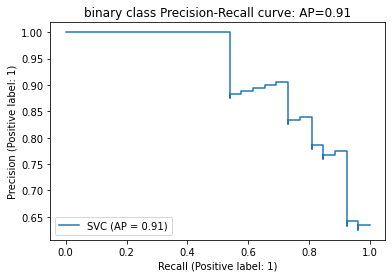

In [35]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

위 그림을 보면 Precision과 Recall 사이의 트레이드오프 관계를 확인할 수 있습니다. Threshold값에 따라 우리가 얻게 되는 Precision, Recall 값은 저 그래프상의 어딘가가 될 것입니다. 물론 우리가 원하는 값은 Precision이든 Recall이든 모두 1에 가깝기를 원합니다. 이상적으로는 그래프가 (1, 1)에 찍히면 좋겠습니다만, 가급적 위 그래프가 (1, 1)에 근접하도록 그려지길 바랍니다.

그래서 Threshold 값에 무관하게 모델의 전체적인 성능을 평가하는 방법으로, 위 PR 커브 아래쪽 면적을 계산하는 방법이 있습니다. 이것을 AUC(Area Under Curve) 값이라고 합니다. PR AUC를 계산하는 방법으로 다음과 같이 사이킷런에서 제공하는 `average_precision_score` 함수를 사용합니다.

sklearn.metrics.average_precision_score
(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html)

$$ AP = \sum_{n} (R_n - R_{n-1})P_n $$

위 수식의 특성을 살펴보면, average_precision_score(AP) 값은, n 값을 무한히 크게 한다면 아주 작은 Recall 구간에 대해 Pn 값을 적분하는 것과 같게 됩니다. 그러므로 PR 커브의 아래쪽 면적인 PR AUC와 같은 의미가 되겠군요. 하지만 사이킷런 문서에서는 `average_precision_score`와 `PR AUC`가 구현 측면에서 약간 다르다고 설명하고 있습니다. 두 개념이 의미적으로 비슷하게 사용될 수 있다고만 이해하면 될 것 같습니다.

In [36]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


average_precision_score 값은 최대 1이 될 수 있을 것입니다. 위에서는 0.91이 나왔군요. 그렇다면 모델을 바꿔 보면 이 값이 어떻게 달라질지 궁금해집니다. 우리는 이전 스텝에서 SVM의 커널을 'poly'로 주었을 때 Accuracy가 매우 낮았던 것을 기억합니다. 이때의 average_precision_score 값이 어떻게 될지 직접 구현해서 확인해 봅시다.

참고로, SVM의 커널의 종류는 다음과 같습니다.(https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
```
kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
```

In [40]:
# Q. 모델을 SVM의 'poly' 커널을 사용하여 average_precision_score를 구하세요.
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

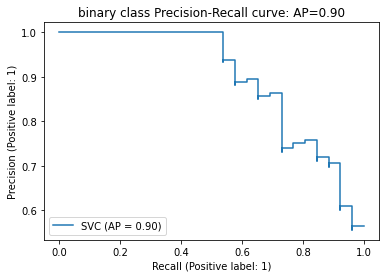

In [41]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## ROC 커브
ROC(Receiver Operating Characteristic Curve) 는 수신자 조작 특성 곡선이라는 단어로 표현할 수 있습니다.
ROC는 앞서 계산해보았던 Confusion Matrix 수치를 활용해, 분류기의 분류 능력을 그래프로 표현하는 방법입니다. 물론 이 그래프도 PR 커브와 마찬가지로 분류기의 Threshold 값의 변화에 따라 Confusion Matrix에 생기는 변화로 인해 그려지는 것입니다.

### ROC 예시 곡선
ROC를 그리는 축인 TP Rate과 FP Rate은 Precision, Recall과 비슷해 보이지만 조금 다른 개념입니다.

TP Rate과 FP Rate은 다음과 같이 계산합니다.

$$ TPR(Sensitivity) = \frac{TP}{TP+FN} $$

$$ FPR(1-Specificity) = \frac{FP}{TN+FP} $$

TP Rate(TPR)의 수식을 잘 보면 실은 우리가 잘 아는 Recall과 같은 것입니다.
FP Rate는 1-Specificity라고 소개되어 있는데, Specificity라는 것은 $\frac{TN}{TN+FP}$
  이 되므로, 실은 음성 샘플에 대한 Recall이라고 볼 수 있습니다.

### AUC 예시 영역

위 그림은 ROC AUC(Area Under the ROC Curve) 를 보여주는 회색 영역으로, 저 영역의 넓이가 넓은 모델일수록, 상대적으로 좋은 성능을 보여준다고 합니다. 하지만 PR 커브만큼 직관적으로 와닿지 않아서, 왜 그런 것인지 얼른 와닿지 않습니다. 그렇다면 일단 한번 그려 보겠습니다. 사이킷런에는 roc_curve, auc 라는 함수를 통해 ROC를 그리거나 ROC AUC를 쉽게 구해볼 수 있습니다.

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


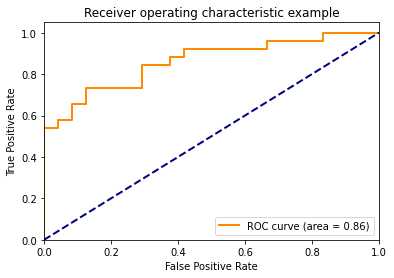

auc result:0.8605769230769231


In [43]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

아주 이상적으로 Precision과 Recall이 전부 1이 되는 완벽한 모델이라면 ROC 커브에서는 어디에 점이 찍힐까요? 네, 바로 (0, 1)일 것입니다. 양성과 음성에 대한 Recall이 모두 1이 될 테니 TPR은 1, FPR은 0이 될 것입니다.

몇가지 극단적인 경우를 생각해 봅시다. 모델이 모든 샘플에 대해 양성이라고 분류한다면 어떨까요? 이땐 이 분류기가 (1, 1)에 찍힐 것입니다. 반대로 모든 샘플에 대해 음성이라고 분류한다면 이 분류기는 (0, 0)에 찍힐 것입니다. 이번엔 완벽한 랜덤 분류기를 가정해 봅시다. 이 분류기는 양성이든 음성이든 무관하게 p의 확률로 양성이라고 분류할 것입니다. 이 랜덤분류기의 Recall은 p가 될 것입니다. 음성에 대한 Recall도 p가 될 테니 이 분류기는 (p, 1-p)에 찍힐 것입니다.

위 그래프에서 (0, 0)과 (1, 1)을 잇는 파란 점선은 바로 위와 같은 극단적인 경우들만 모아놓은 경우입니다. 그래서 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 하며, 가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다. 그러므로 ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다.

ROC AUC 값도 최대 1이 될 수 있을 것입니다. 위에서는 0.89 정도가 나왔군요. 이번에도 SVM 커널의 종류를 바꿔 가며 ROC 커브를 그리고 ROC AUC 값을 구하는 코드를 직접 작성해 봅시다.

In [45]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

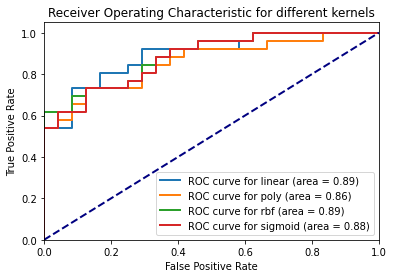

In [47]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# ROC 곡선을 그리기 위한 설정
plt.figure()
lw = 2

for k in kernels:
    classifier = svm.SVC(kernel=k, random_state=random_state)
    classifier.fit(X_train, y_train)
    y_score = classifier.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, label=f'ROC curve for {k} (area = {roc_auc:.2f})')


# 기준선 추가
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# 플롯 설정
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for different kernels')
plt.legend(loc="lower right")

# 결과 표시
plt.show()

## 다양한 머신러닝 모델의 평가척도
지금까지 우리는 분류 모델의 평가척도에 대해 알아 보았습니다. 분류 문제에 있어 문제의 성격, 분류 기준 등 다양한 변수에 따라 정확한 모델 평가 척도는 달라질 수 있어 다소 복잡하였습니다. 하지만 머신러닝에는 분류만 있는 것이 아니라 회귀, 추천, 군집 등 다양한 모델이 있습니다. 음성, 이미지, 텍스트 등의 생성형 모델들이 가지는 독특한 평가 척도들도 매우 다양합니다. 이 내용들을 오늘 모두 깊이있게 다룰 수는 없을 것입니다. 오늘 언급되는 내용 대부분은 향후 실제 프로젝트를 수행하면서 다시 다루어지겠지만, 오늘은 우리가 다루고자 하는 문제의 특성에 따라 이렇게 다양한 평가 척도가 존재할 수 있다는 것을 알아보는 것으로 하겠습니다.

### 회귀 모델의 평가척도
회귀 모델은 분류 모델에 비해 평가척도를 다루는 것이 간단합니다. loss 함수가 테스트셋에 적용될 때 그대로 Metric이 되는 경우가 대부분입니다. 그래서 회귀 모델의 경우에는 어떤 loss가 적합한지 그 특성을 알아보는 것이 중요하게 됩니다.

회귀 모델의 평가척도에 대한 아래 글을 읽어보고, 다음 질문에 답해 주세요.
(https://partrita.github.io/posts/regression-error/)

#### Q. MSE, RMSE 등 square 계열 Metric과 MAE, MAPE 등 absolute value 계열 Metric이 특이값에 대해 어떤 차이를 보이는지 설명해 주세요.
MSE, RMSE는 오차의 제곱에 비례하여 수치가 늘어나므로, 특이값에 민감하게 반응하며, Outlier가 많은 데이터에 대해 모델이 강건(robust)하지 못하다. MAE, MAPE는 오차의 절대값에 비례해서 수치가 늘어나는데 상대적으로 특이값에 민감하지 않고 Outlier가 많은 데이터에 대해 강건한다.

#### 랭킹 모델의 평가척도
추천시스템은 넓게 보면 정보 검색(Information Retrieval)과 같은 로직을 가지고 있습니다. 이런 모델들이 일반적인 분류모델과 다른 점은, 랭킹(우선순위) 개념이 추가된다는 점입니다. User를 입력으로 했을 때, Item들이 추천할만한지 여부를 분류만 하는 것이 아니라, 얼마나 추천할만 한지 랭킹까지 매겨야 한다는 점입니다.

랭킹 모델의 평가척도에 대한 아래 글을 읽어보고, 다음 질문에 답해 주세요.
(https://modulabs.co.kr/blog/information-retrieval-map-ndcg/)

### Q. NDCG가 MRR, MAP 등 이전 평가척도들에 비해 어떤 부분에서 좋아졌다고 할 수 있을까요?

A : 랭킹을 매기기 위해 임의성을 배제하고 모든 콘텐츠 아이템에 대한 관련성을 계산하여 랭킹에 반영한다.

#### 이미지 생성 모델의 평가척도
모델을 평가한다는 것은 결국 정답과 모델의 예측치 사이의 거리를 측정하는 방식입니다. 그런데 이미지 생성 모델에서 원본 이미지와 새로운 이미지 사이의 거리를 어떻게 측정할 수 있을까요?

이미지 생성 모델의 평가척도에 대한 아래 글을 읽어보고, 다음 질문에 답해 주세요.
(https://modulabs.co.kr/blog/how-to-measure-similarity)

#### 이미지 생성 모델의 유사성 측정
모델을 평가한다는 것은 결국 정답과 모델의 예측치 사이의 거리를 측정하는 방식입니다.

그런데 이미지 생성 모델에서 원본 이미지와 새로운 이미지 사이의 거리를 어떻게 측정할 수 있을까요?

이미지 간의 유사도(유사성)를 측정하는 방법에는 여러 가지가 있는데, 그 중 기본적인 3가지를 살펴 보겠습니다. 

    평균 제곱 오차(MSE, Mean Squared Error)
    최대 신호 대 잡음비(PSNR, Peak Signal-to-noise ratio)
    구조적 유사도(SSIM, Structural Similarity Index)


#### Q. MSE나 PSNR 대비 SSIM이 가지는 가장 큰 차이점은 무엇인가요?
MSE나 PSNR은 모두 픽셀 단위로 비교해서 거리를 측정한다. 그러나 이 방식은 이미지가 약간 평행이동해 있어도 두 차이를 크게 측정하는 단점이 있다. SSIM은 이와 달리 픽셀 단위 비교보다는 이미지 내의 구조적 차이에 집중하는 방식을 쓴다.

#### 기계번역 모델의 평가척도
이미지 생성모델에서 원본과 생성본을 비교하여 거리를 잰다는 것은 까다롭긴 하지만 RGB 공간 등 두 이미지 사이의 거리를 측정할 수 있는 개념적 공간이 존재합니다. 그러나 텍스트라면 어떨까요? 텍스트 생성 모델 중 가장 대중적인 것은 기계번역 모델입니다. 영어를 한국어로 번역한 문장이 정답 한국어와 얼마나 비슷한지를 어떻게 측정하면 좋을까요?

기계번역 모델의 평가척도에 대한 아래 글을 읽어보고, 다음 질문에 답해 주세요.
(https://donghwa-kim.github.io/BLEU.html)

#### Q. BLEU score는 결국 두 텍스트가 얼마나 겹치는지를 측정하는 척도입니다. BLEU에서는 텍스트가 겹치는 정도를 어떻게 측정하나요?
1-gram, 2-gram, 3-gram, 4-gram이 두 문장 사이에 몇번이나 공통되게 출현하는지를 측정합니다.

## 종합 퀴즈
Precision을 높이기 위해선 TP, TN, FP, FN 중 어떤 값이 어떻게 조정되어야 하는지 이야기해 봅시다.

TP 개수가 커지고, FP 개수가 줄어들수록 Precision은 높아진다.

AUC 값 범위는 항상 0 ~ 1 이기 때문에, 모델 종류와 관계없이 얼마나 잘 예측하는지 비교해 볼 수 있습니다.